In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from descartes import PolygonPatch
import matplotlib.patheffects as PathEffects

datafile = 'kg_regions.csv'
shapefile = 'ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.dbf'

colors = 7
cmap = 'Blues'
figsize = (16, 10)

In [2]:
gdf = gpd.read_file(shapefile).to_crs('+proj=robin')
gdf = gdf[['adm1_code', 'iso_3166_2', 'iso_a2', 'adm0_sr', 'name', 'name_ru', 'geometry']]
gdf = gdf[gdf['iso_a2'] == 'KG']

In [3]:
kg_df = pd.read_csv(datafile)
kg_df
merged = gdf.merge(kg_df, left_on='iso_3166_2', right_on='ISO', how='inner')
merged = merged[['iso_3166_2', 'Name', 'Kyrgyz', 'Russian', 'Capital', 'Area (km²)', 'Population (1999)', 'Population (2009)', 'Population (2015 est.)', 'geometry']]
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
merged.to_csv('merged.csv', index=False)

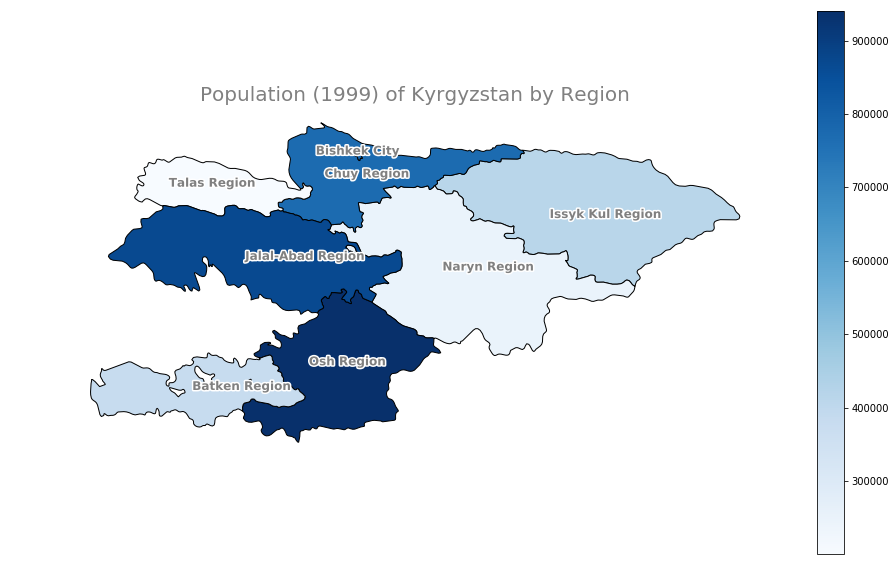

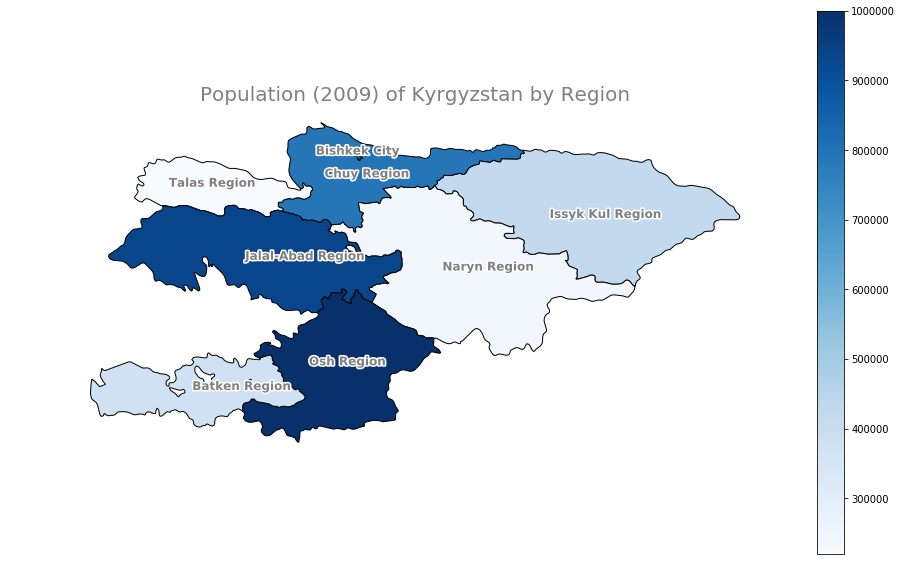

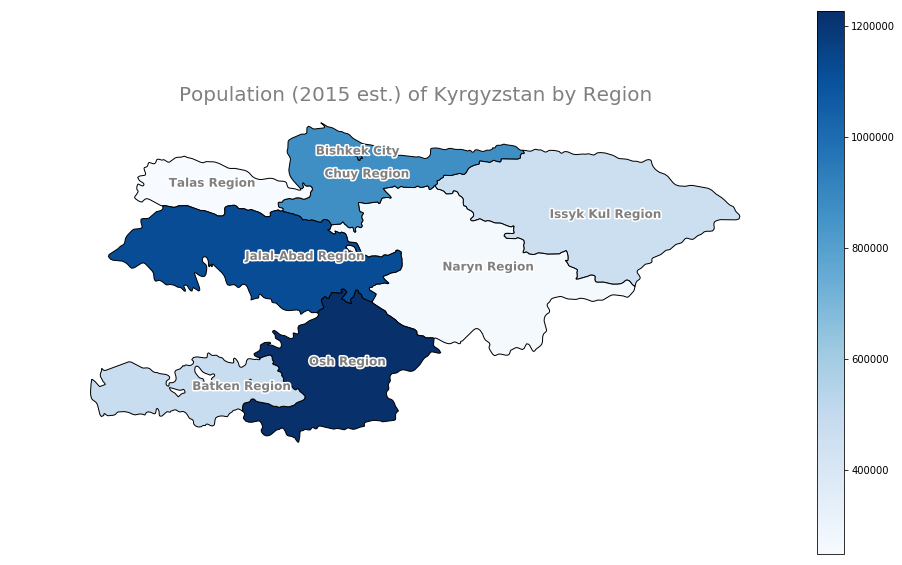

In [11]:
years=['Population (1999)', 'Population (2009)', 'Population (2015 est.)']
for year in years:
    ax = merged.dropna().plot(column=merged[year], cmap=cmap, figsize=figsize, k=colors, legend=True, edgecolor='black')
#     merged[merged[year].isna()].plot(ax=ax, color='#fafafa', hatch='///')
    ax.set_axis_off()
#     ax.set_xlim([-1.5e7, 1.7e7])
    title = '{} of Kyrgyzstan by Region'.format(year)
    ax.set_title(title, fontdict={'fontsize': 20}, loc='center', color='grey')
    for idx, row in merged.iterrows():
        txt = plt.annotate(s=row['Name'], xy=row['coords'],
                 color='grey', fontsize=12, weight='bold', horizontalalignment='center')
#         plt.annotate(s=row['Russian'], xy=row['coords'],
#                  color='red', horizontalalignment='left')
        txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])
#         plt.draw()

    plt.savefig(f'{year}.png')